# Метод k-средних (k-means clustering)

## Задание 1
1. Реализовать kmeans
2. Визуализировать сходимость центров кластеров
3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

In [91]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random
import numpy as np

Дано 5 классов:

In [92]:
X, Y = make_blobs(n_samples = 200, centers=5, n_features=2, cluster_std = 1, random_state=17)

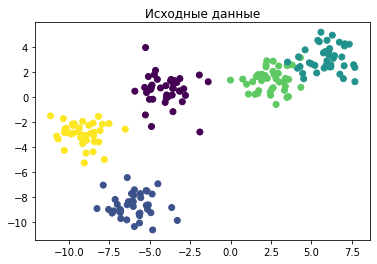

In [93]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Исходные данные');

На вход алгоритм получает матрицу данных $X$, количество кластеров $k$, и критерий остановки $\epsilon$:

In [94]:
class KMeans(object):
    
    def __init__(self, k = 5, eps = 0.001):
        self.k = k
        self.eps = eps
    
    """
    Метод выбирает k случайных центров (k средних)
    
    """
    def _init_centroids(self, data, k):
        return data[np.random.choice(len(data), size = k, replace = False)]
    
    """
    Метод вычисляет евклидову меру
    
    """
    def _euclidean_distance(self, obj, data):
        return np.sum((obj - data) ** 2, axis = 1)
    
    """
    Метод присоединяет все объекты к ближайшим кластерам
    
    """
    def _add_objects_to_clusters(self, data, centroids):
        clusters = []        
        for obj in data:
            distances = self._euclidean_distance(obj, centroids)
            # Ищем для каждой точки ближайший центроид
            val, index = min((val, index) for (index, val) in enumerate(distances))
            # Присваиваем точке кластер
            clusters.append(index)
        return clusters
    
    """
    Метод минимизирует полную сумму квадратов расстояний от каждой точки
    до среднего значения назначенного ей кластера
    
    """
    def fit(self, data):
        self.centroids = self._init_centroids(data, self.k)     
        data_clusters = self._add_objects_to_clusters(data, self.centroids)
        return
    
    """
    Метод разбивает объекты в выборке на кластеры
    
    """
    def predict(self, data):
        data_clusters = self._add_objects_to_clusters(data, self.centroids)
        return np.array(data_clusters)
    